<a href="https://colab.research.google.com/github/Zekeriya-Ui/Brownian-motion/blob/main/MScFE_620_DP_GWP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 5**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def european_call_binomial(S_ini, K, T, r, u, d, N):
    """
    Prices a European call option using a binomial tree.
    Returns the full stock and option price trees.
    """
    dt = T / N
    p = (np.exp(r * dt) - d) / (u - d)
    C = np.zeros([N + 1, N + 1])
    S = np.zeros([N + 1, N + 1])

    for i in range(0, N + 1):
        stock_price_at_node = S_ini * (u ** i) * (d ** (N - i))
        S[N, i] = stock_price_at_node
        C[N, i] = max(stock_price_at_node - K, 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))

    return C[0, 0], C, S

def european_put_binomial(S_ini, K, T, r, u, d, N):
    """
    Prices a European put option using a binomial tree.
    Returns the full stock and option price trees.
    """
    dt = T / N
    p = (np.exp(r * dt) - d) / (u - d)
    P = np.zeros([N + 1, N + 1])
    S = np.zeros([N + 1, N + 1])

    for i in range(0, N + 1):
        stock_price_at_node = S_ini * (u ** i) * (d ** (N - i))
        S[N, i] = stock_price_at_node
        P[N, i] = max(K - stock_price_at_node, 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))

    return P[0, 0], P, S

# Initialize
S0 = 100.
K = 100.
r = 0.05
sigma = 0.20
T = 3 / 12

# Set up trees
N = 90
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = np.exp(-sigma * np.sqrt(dt))

# ATM European call
call_price, C, S_call = european_call_binomial(S0, K, T, r, u, d, N)

# ATM European put
put_price, P, S_put = european_put_binomial(S0, K, T, r, u, d, N)

print("--- Results ---")
print(f"Parameters: S0={S0}, K={K}, r={r}, sigma={sigma}, T={T}, N={N}")
print("-" * 25)
print(f"ATM European Call Price: {call_price:.4f}")
print(f"ATM European Put Price:  {put_price:.4f}")

--- Results ---
Parameters: S0=100.0, K=100.0, r=0.05, sigma=0.2, T=0.25, N=90
-------------------------
ATM European Call Price: 4.6039
ATM European Put Price:  3.3617


**Question 6**

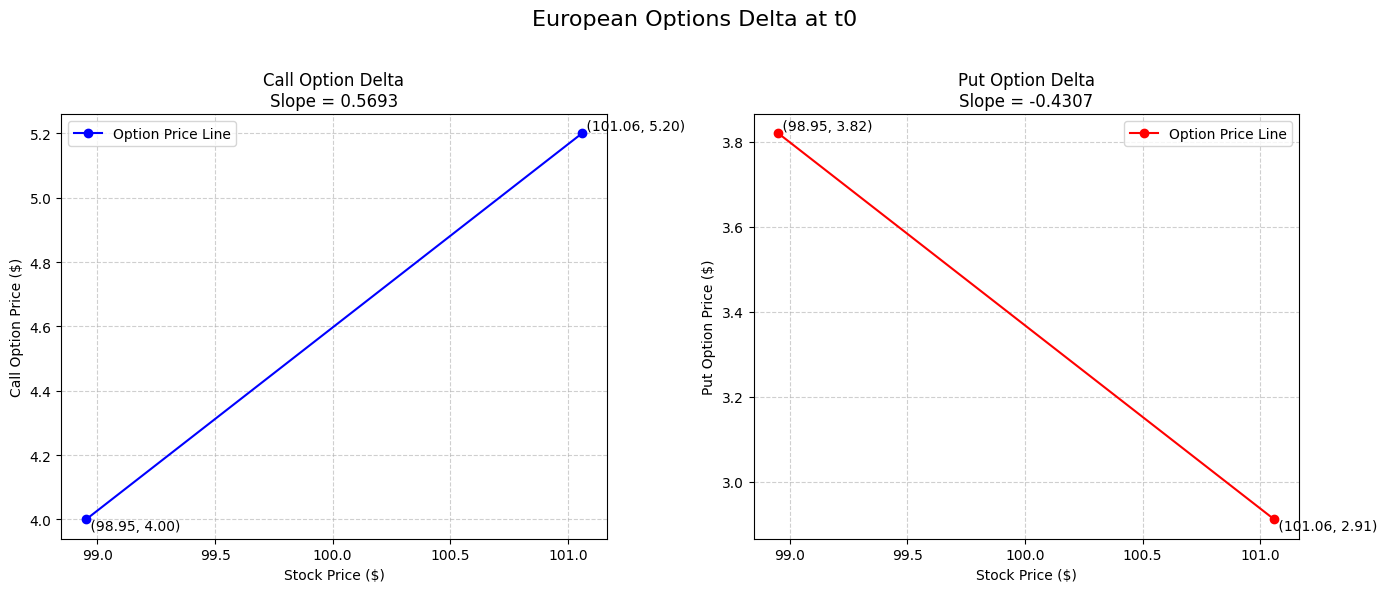

In [ ]:
c_down = C[1,0]
c_up = C[1,1]
p_down = P[1,0]
p_up = P[1,1]

s_up = S0 * u
s_down = S0 * d


delta_call = (c_up - c_down) / (s_up - s_down)
delta_put = (p_up - p_down) / (s_up - s_down)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('European Options Delta at t0', fontsize=16)

ax1.plot([s_down, s_up], [c_down, c_up], 'bo-', label='Option Price Line')
ax1.set_title(f'Call Option Delta\nSlope = {delta_call:.4f}', fontsize=12)
ax1.set_xlabel('Stock Price ($)')
ax1.set_ylabel('Call Option Price ($)')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend()
ax1.text(s_down, c_down, f' ({s_down:.2f}, {c_down:.2f})', va='top')
ax1.text(s_up, c_up, f' ({s_up:.2f}, {c_up:.2f})', va='bottom')


ax2.plot([s_down, s_up], [p_down, p_up], 'ro-', label='Option Price Line')
ax2.set_title(f'Put Option Delta\nSlope = {delta_put:.4f}', fontsize=12)
ax2.set_xlabel('Stock Price ($)')
ax2.set_ylabel('Put Option Price ($)')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend()
ax2.text(s_down, p_down, f' ({s_down:.2f}, {p_down:.2f})', va='bottom')
ax2.text(s_up, p_up, f' ({s_up:.2f}, {p_up:.2f})', va='top')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Question 7**

In [ ]:
sigma_new = 0.25

# Recalc
u_new = np.exp(sigma_new * np.sqrt(dt))
d_new = np.exp(-sigma_new * np.sqrt(dt))

call_price_new, _, _ = european_call_binomial(S0, K, T, r, u_new, d_new, N)
put_price_new, _, _ = european_put_binomial(S0, K, T, r, u_new, d_new, N)

# Calculate the change in prices
call_price_change = call_price_new - call_price
put_price_change = put_price_new - put_price

print(f"New ATM European Call Price (σ=25%): {call_price_new:.4f} vs {call_price:.4f}")
print(f"New ATM European Put Price (σ=25%):  {put_price_new:.4f} vs {put_price:.4f}")
print(f"Change in Call Price: {call_price_change:.4f}")
print(f"Change in Put Price:  {put_price_change:.4f}")

New ATM European Call Price (σ=25%): 5.5846 vs 4.6039
New ATM European Put Price (σ=25%):  4.3424 vs 3.3617
Change in Call Price: 0.9807
Change in Put Price:  0.9807


**Question 8**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def european_call_binomial(S_ini, K, T, r, u, d, N):
    """
    Prices a European call option using a binomial tree.
    Returns the full stock and option price trees.
    """
    dt = T / N
    p = (np.exp(r * dt) - d) / (u - d)
    C = np.zeros([N + 1, N + 1])
    S = np.zeros([N + 1, N + 1])

    for i in range(0, N + 1):
        stock_price_at_node = S_ini * (u ** i) * (d ** (N - i))
        S[N, i] = stock_price_at_node
        C[N, i] = max(stock_price_at_node - K, 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))

    return C[0, 0], C, S

def european_put_binomial(S_ini, K, T, r, u, d, N):
    """
    Prices a European put option using a binomial tree.
    Returns the full stock and option price trees.
    """
    dt = T / N
    p = (np.exp(r * dt) - d) / (u - d)
    P = np.zeros([N + 1, N + 1])
    S = np.zeros([N + 1, N + 1])

    for i in range(0, N + 1):
        stock_price_at_node = S_ini * (u ** i) * (d ** (N - i))
        S[N, i] = stock_price_at_node
        P[N, i] = max(K - stock_price_at_node, 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))

    return P[0, 0], P, S

def american_call_binomial(S_ini, K, T, r, u, d, N):
    """
    Prices an American call option using a binomial tree.
    Returns the full stock and option price trees.
    """
    dt = T / N
    p = (np.exp(r * dt) - d) / (u - d)
    C = np.zeros([N + 1, N + 1])
    S = np.zeros([N + 1, N + 1])

    for i in range(0, N + 1):
        stock_price_at_node = S_ini * (u ** i) * (d ** (N - i))
        S[N, i] = stock_price_at_node
        C[N, i] = max(stock_price_at_node - K, 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            C[j, i] = max(np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]), S[j, i] - K)

    return C[0, 0], C, S

def american_put_binomial(S_ini, K, T, r, u, d, N):
    """
    Prices an American put option using a binomial tree.
    Returns the full stock and option price trees.
    """
    dt = T / N
    p = (np.exp(r * dt) - d) / (u - d)
    P = np.zeros([N + 1, N + 1])
    S = np.zeros([N + 1, N + 1])

    for i in range(0, N + 1):
        stock_price_at_node = S_ini * (u ** i) * (d ** (N - i))
        S[N, i] = stock_price_at_node
        P[N, i] = max(K - stock_price_at_node, 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            P[j, i] = max(np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i]), K - S[j, i])

    return P[0, 0], P, S


# Initialize
S0 = 100.
K = 100.
r = 0.05
sigma = 0.20
T = 3 / 12

# Set up trees
N = 90
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = np.exp(-sigma * np.sqrt(dt))

# ATM European call
call_price, C, S_call = european_call_binomial(S0, K, T, r, u, d, N)

# ATM European put
put_price, P, S_put = european_put_binomial(S0, K, T, r, u, d, N)

# ATM American call
american_call_price, C_american, S_call_american = american_call_binomial(S0, K, T, r, u, d, N)

# ATM American put
american_put_price, P_american, S_put_american = american_put_binomial(S0, K, T, r, u, d, N)


print("--- Results ---")
print(f"Parameters: S0={S0}, K={K}, r={r}, sigma={sigma}, T={T}, N={N}")
print("-" * 25)
print(f"ATM European Call Price: {call_price:.4f}")
print(f"ATM European Put Price:  {put_price:.4f}")
print(f"ATM American Call Price: {american_call_price:.4f}")
print(f"ATM American Put Price:  {american_put_price:.4f}")

--- Results ---
Parameters: S0=100.0, K=100.0, r=0.05, sigma=0.2, T=0.25, N=90
-------------------------
ATM European Call Price: 4.6039
ATM European Put Price:  3.3617
ATM American Call Price: 4.6039
ATM American Put Price:  3.4740


**Question 9**

In [ ]:
import numpy as np

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price (ATM)
r = 0.05  # Risk-free rate
sigma = 0.20  # Original volatility
sigma_new = 0.25  # New volatility
T = 0.25  # Time to expiration (3 months)
N = 90    # Number of steps
dt = T / N  # Time step

# Binomial model function for American options
def american_option_binomial(S0, K, T, r, u, d, N, option_type="call"):
    dt = T / N
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability
    discount = np.exp(-r * dt)

    # Initialize stock price tree
    S = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            S[j, i] = S0 * (u ** j) * (d ** (i - j))

    # Initialize option value tree
    V = np.zeros((N + 1, N + 1))

    # Set terminal payoffs
    for j in range(N + 1):
        if option_type == "call":
            V[j, N] = max(S[j, N] - K, 0)
        else:  # put
            V[j, N] = max(K - S[j, N], 0)

    # Backward induction
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            # Continuation value
            V[j, i] = discount * (p * V[j + 1, i + 1] + (1 - p) * V[j, i + 1])
            # Exercise value
            if option_type == "call":
                exercise_value = max(S[j, i] - K, 0)
            else:  # put
                exercise_value = max(K - S[j, i], 0)
            # American option: max of continuation and exercise
            V[j, i] = max(V[j, i], exercise_value)

    return V[0, 0]

# Original parameters (σ = 0.20)
u = np.exp(sigma * np.sqrt(dt))
d = np.exp(-sigma * np.sqrt(dt))
call_price = american_option_binomial(S0, K, T, r, u, d, N, "call")
put_price = american_option_binomial(S0, K, T, r, u, d, N, "put")

# New parameters (σ_new = 0.25)
u_new = np.exp(sigma_new * np.sqrt(dt))
d_new = np.exp(-sigma_new * np.sqrt(dt))
call_price_new = american_option_binomial(S0, K, T, r, u_new, d_new, N, "call")
put_price_new = american_option_binomial(S0, K, T, r, u_new, d_new, N, "put")

# Calculate price changes
call_price_change = call_price_new - call_price
put_price_change = put_price_new - put_price

# Print results
print(f"New ATM American Call Price (σ=25%): {call_price_new:.4f} vs {call_price:.4f}")
print(f"New ATM American Put Price (σ=25%): {put_price_new:.4f} vs {put_price:.4f}")
print(f"Change in Call Price: {call_price_change:.4f}")
print(f"Change in Put Price: {put_price_change:.4f}")

New ATM American Call Price (σ=25%): 5.5846 vs 4.6039
New ATM American Put Price (σ=25%): 4.4521 vs 3.4740
Change in Call Price: 0.9807
Change in Put Price: 0.9781


Question 10

In [ ]:
import numpy as np

def trinomial_tree_european_option(S0, K, T, r, sigma, N, option_type='call'):
    dt = T / N
    nu = r - 0.5 * sigma**2
    dx = sigma * np.sqrt(3 * dt)

    u = np.exp(dx)
    d = np.exp(-dx)

    # Probabilities for equal jumps
    pu = 0.5 * (((sigma**2 * dt + nu**2 * dt**2) / dx**2) + (nu * dt / dx))
    pd = 0.5 * (((sigma**2 * dt + nu**2 * dt**2) / dx**2) - (nu * dt / dx))
    pm = 1 - pu - pd

    discount = np.exp(-r * dt)

    # Asset prices lattice
    asset_prices = np.zeros((N+1, 2*N+1))
    for i in range(N+1):
        for j in range(-i, i+1):
            asset_prices[i, j+N] = S0 * (u**j)

    # Option values at maturity
    option_values = np.zeros(2*N+1)
    if option_type == 'call':
        option_values = np.maximum(asset_prices[N] - K, 0)
    elif option_type == 'put':
        option_values = np.maximum(K - asset_prices[N], 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    # Backward induction
    for i in range(N-1, -1, -1):
        for j in range(-i, i+1):
            option_values[j+N] = discount * (
                pu * option_values[j+1+N] +
                pm * option_values[j+N] +
                pd * option_values[j-1+N]
            )

    return option_values[N]

# Parameters
S0 = 100
T = 1
r = 0.05
sigma = 0.2
N = 100
strike_prices = [90, 95, 100, 105, 110]

# Compute call prices
call_prices1 = [trinomial_tree_european_option(S0, K, T, r, sigma, N, 'call') for K in strike_prices]

# Compute put prices
put_prices1 = [trinomial_tree_european_option(S0, K, T, r, sigma, N, 'put') for K in strike_prices]

# Print results
print("European Call Option Prices:")
for K, price in zip(strike_prices, call_prices1):
    print(f"Strike Price K = {K}: Call Price = {price:.4f}")

print("\nEuropean Put Option Prices:")
for K, price in zip(strike_prices, put_prices1):
    print(f"Strike Price K = {K}: Put Price = {price:.4f}")


European Call Option Prices:
Strike Price K = 90: Call Price = 17.7983
Strike Price K = 95: Call Price = 14.4976
Strike Price K = 100: Call Price = 11.5673
Strike Price K = 105: Call Price = 9.1096
Strike Price K = 110: Call Price = 7.0329

European Put Option Prices:
Strike Price K = 90: Put Price = 2.5951
Strike Price K = 95: Put Price = 4.0052
Strike Price K = 100: Put Price = 5.7859
Strike Price K = 105: Put Price = 8.0391
Strike Price K = 110: Put Price = 10.6733


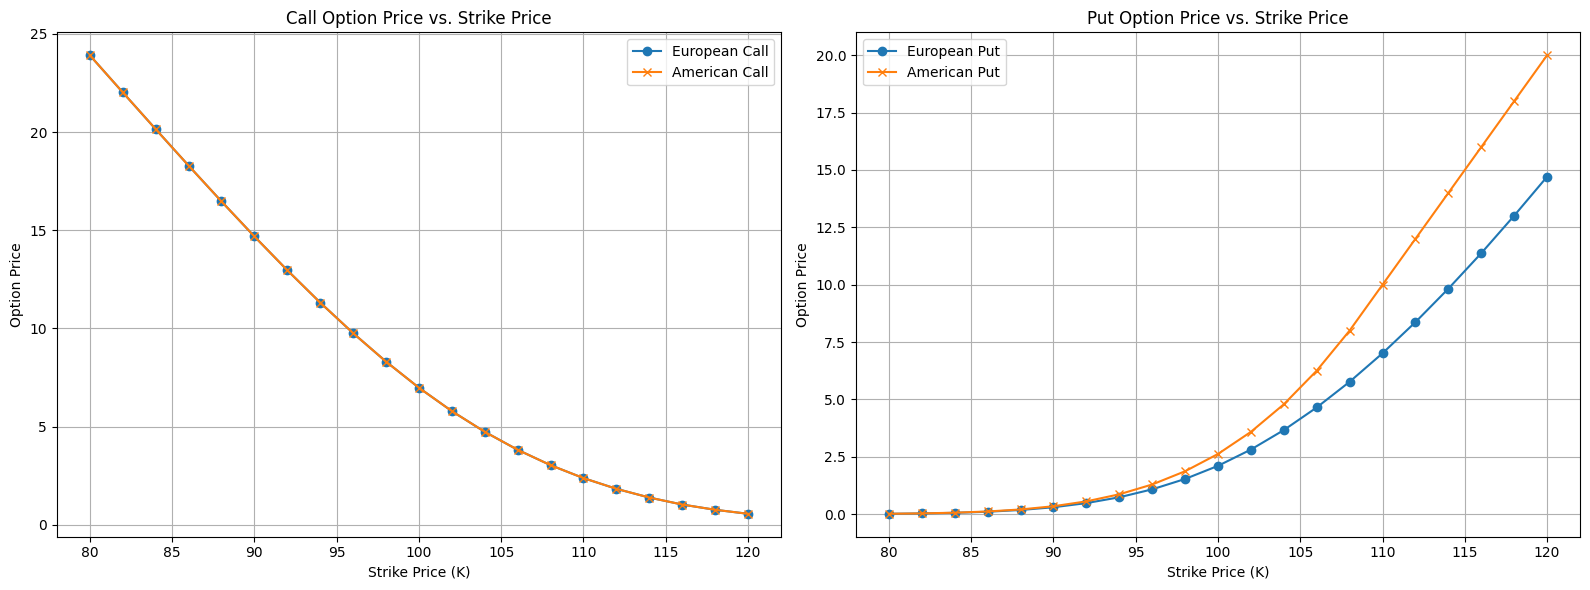

In [ ]:
# Calculate option prices for a range of strike prices
strike_prices_range = np.arange(80, 121, 2)
european_call_prices_range = []
european_put_prices_range = []
american_call_prices_range = []
american_put_prices_range = []

for K_i in strike_prices_range:
    call_price_eu, _, _ = european_call_binomial(S0, K_i, T, r, u, d, N)
    put_price_eu, _, _ = european_put_binomial(S0, K_i, T, r, u, d, N)
    call_price_am, _, _ = american_call_binomial(S0, K_i, T, r, u, d, N)
    put_price_am, _, _ = american_put_binomial(S0, K_i, T, r, u, d, N)

    european_call_prices_range.append(call_price_eu)
    european_put_prices_range.append(put_price_eu)
    american_call_prices_range.append(call_price_am)
    american_put_prices_range.append(put_price_am)

# Plotting option prices vs. strike price (moneyness)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# European vs American Call Option Prices
axes[0].plot(strike_prices_range, european_call_prices_range, label='European Call', marker='o')
axes[0].plot(strike_prices_range, american_call_prices_range, label='American Call', marker='x')
axes[0].set_title('Call Option Price vs. Strike Price')
axes[0].set_xlabel('Strike Price (K)')
axes[0].set_ylabel('Option Price')
axes[0].legend()
axes[0].grid(True)

# European vs American Put Option Prices
axes[1].plot(strike_prices_range, european_put_prices_range, label='European Put', marker='o')
axes[1].plot(strike_prices_range, american_put_prices_range, label='American Put', marker='x')
axes[1].set_title('Put Option Price vs. Strike Price')
axes[1].set_xlabel('Strike Price (K)')
axes[1].set_ylabel('Option Price')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def trinomial_tree_american_option(S0, K, T, r, sigma, N, option_type='call'):
    dt = T / N
    nu = r - 0.5 * sigma**2
    dx = sigma * np.sqrt(3 * dt)

    u = np.exp(dx)
    d = np.exp(-dx)

    # Probabilities for equal jumps
    pu = 0.5 * (((sigma**2 * dt + nu**2 * dt**2) / dx**2) + (nu * dt / dx))
    pd = 0.5 * (((sigma**2 * dt + nu**2 * dt**2) / dx**2) - (nu * dt / dx))
    pm = 1 - pu - pd

    discount = np.exp(-r * dt)

    # Initialize asset prices at maturity (t = T)
    asset_prices_T = np.zeros(2 * N + 1)
    for i in range(2 * N + 1):
        asset_prices_T[i] = S0 * np.exp((i - N) * dx)

    # Initialize option values at maturity
    if option_type == 'call':
        option_values = np.maximum(asset_prices_T - K, 0)
    elif option_type == 'put':
        option_values = np.maximum(K - asset_prices_T, 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    # Backward induction
    for i in range(N - 1, -1, -1):
        next_values = option_values.copy()
        option_values = np.zeros(2 * i + 1)
        # Asset prices at the current time step
        asset_prices_i = np.zeros(2 * i + 1)
        for j in range(2 * i + 1):
            asset_prices_i[j] = S0 * np.exp((j - i) * dx)

            # Continuation value (value of holding the option)
            continuation_value = discount * (
                pu * next_values[j + 2] + pm * next_values[j + 1] + pd * next_values[j]
            )

            # Exercise value (intrinsic value)
            if option_type == 'call':
                exercise_value = np.maximum(asset_prices_i[j] - K, 0)
            else: # put
                exercise_value = np.maximum(K - asset_prices_i[j], 0)

            # The option value is the maximum of holding or exercising
            option_values[j] = np.maximum(continuation_value, exercise_value)

    return option_values[0]

In [ ]:
# Parameters
S0 = 100
T = 1
r = 0.05
sigma = 0.2
N = 100
strike_prices = [90, 95, 100, 105, 110]

# Compute call prices
call_prices2 = [trinomial_tree_american_option(S0, K, T, r, sigma, N, 'call') for K in strike_prices]

# Compute put prices
put_prices2 = [trinomial_tree_american_option(S0, K, T, r, sigma, N, 'put') for K in strike_prices]


# Print results
print("American Call Option Prices:")
for K, price in zip(strike_prices, call_prices2):
    print(f"Strike Price K = {K}: Call Price = {price:.4f}")

print("\nAmerican Put Option Prices:")
for K, price in zip(strike_prices, put_prices2):
    print(f"Strike Price K = {K}: Put Price = {price:.4f}")

American Call Option Prices:
Strike Price K = 90: Call Price = 16.6890
Strike Price K = 95: Call Price = 13.3547
Strike Price K = 100: Call Price = 10.4318
Strike Price K = 105: Call Price = 8.0303
Strike Price K = 110: Call Price = 6.0426

American Put Option Prices:
Strike Price K = 90: Put Price = 2.4607
Strike Price K = 95: Put Price = 4.0143
Strike Price K = 100: Put Price = 6.0716
Strike Price K = 105: Put Price = 8.7361
Strike Price K = 110: Put Price = 11.9646


**Question 10**

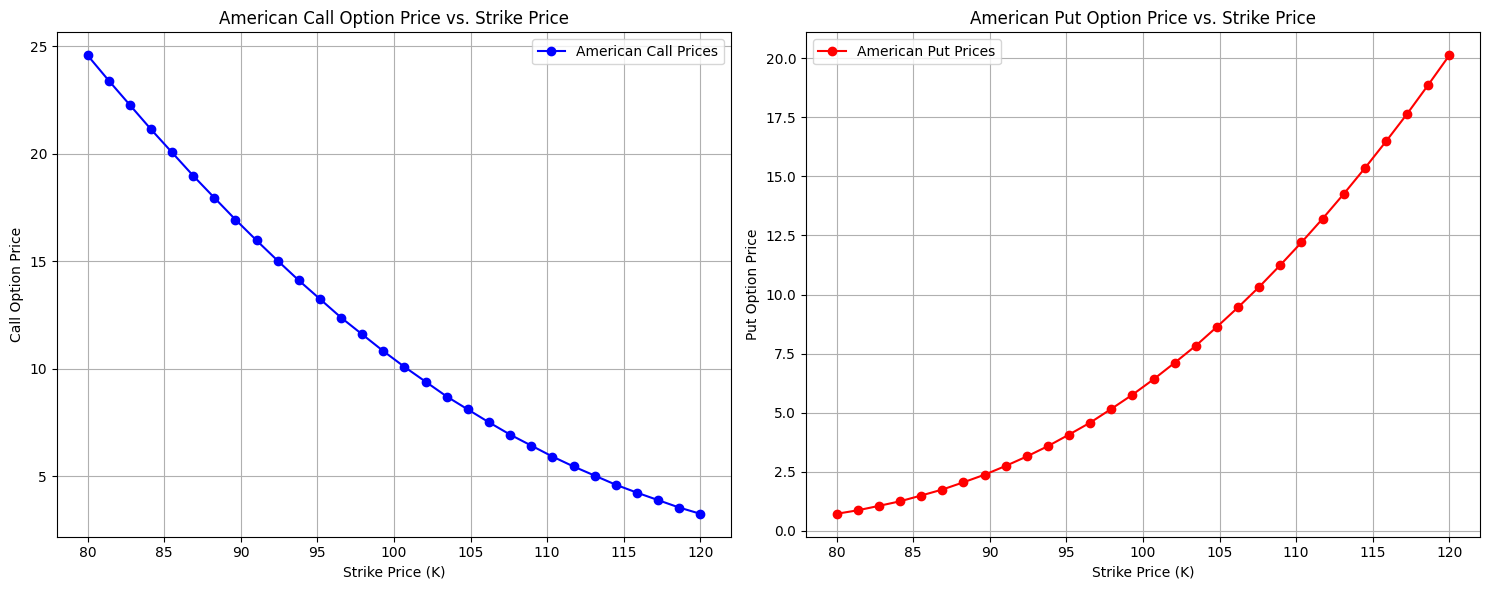

In [ ]:
import matplotlib.pyplot as plt

strike_prices = np.linspace(80, 120, 30)


# Compute call prices
call_prices = [trinomial_tree_american_option(S0, K, T, r, sigma, N, 'call') for K in strike_prices]

# Compute put prices
put_prices = [trinomial_tree_american_option(S0, K, T, r, sigma, N, 'put') for K in strike_prices]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(strike_prices, call_prices, 'bo-', label='American Call Prices')
ax1.set_title('American Call Option Price vs. Strike Price')
ax1.set_xlabel('Strike Price (K)')
ax1.set_ylabel('Call Option Price')
ax1.grid(True)
ax1.legend()

ax2.plot(strike_prices, put_prices, 'ro-', label='American Put Prices')
ax2.set_title('American Put Option Price vs. Strike Price')
ax2.set_xlabel('Strike Price (K)')
ax2.set_ylabel('Put Option Price')
ax2.grid(True)
ax2.legend()
plt.tight_layout()
plt.show()

**Question 10**

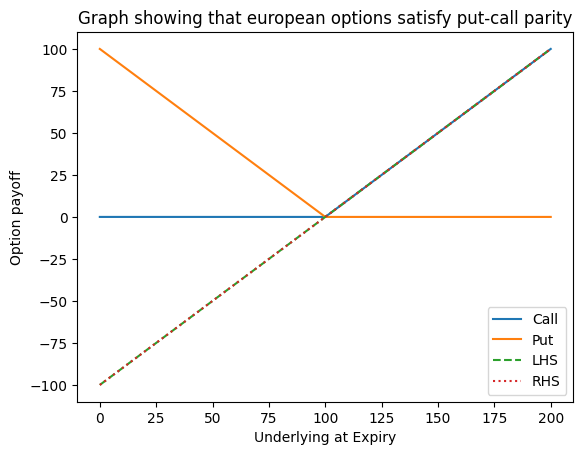

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
#Creating graph to show that european option satisy put-call parity
S_ini = 100 #underlying price
K = 100 #Strike
r = .1
T  = 0

S_ini = np.linspace (0, 200, 200)
payoffCall = np.maximum(S_ini - K, 0)
payoffPut = np.maximum(K-S_ini, 0)
LHS = payoffCall - payoffPut
RHS = S_ini - K * math.exp(r*T)
plt.plot(S_ini, payoffCall, label = "Call")
plt.plot(S_ini, payoffPut, label = "Put")
plt.plot(S_ini, LHS, "--", label ="LHS")
plt.plot(S_ini, RHS, ":", label = "RHS")
# plt.axvline(
plt.xlabel ("Underlying at Expiry")
plt.ylabel ("Option payoff")
plt.title("Graph showing that european options satisfy put-call parity")
plt.legend()
plt.show()

**Question 19**

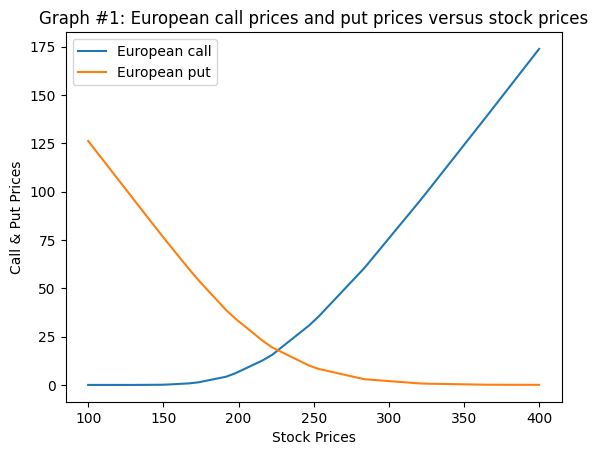

In [ ]:
K = 250
T = 1
r = .1
v = .2
s_range = np.linspace(100, 400)

def option_price(s0, K, T, r, v, call = True):
    dt = T/10
    u = np.exp(v*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r*dt) - d) / (u - d)

    St = np.array([s0*(u**i)*(d**(10-i)) for i in range(11)])

    payoff = np.maximum(St - K, 0) if call else np.maximum(K - St,0)

    for step in range (10):
        payoff = (p*payoff[1:] + (1-p) * payoff[:-1]) * np.exp(-r*dt)
    return payoff[0]

call = np.array([option_price(S, K, T, r, v, True) for S in s_range])
put = np.array([option_price(S, K, T, r, v, False) for S in s_range])

# plt.figure(
plt.title("Graph #1: European call prices and put prices versus stock prices")
plt.plot(s_range, call, label="European call")
plt.plot(s_range, put, label="European put")
plt.xlabel("Stock Prices")
plt.ylabel("Call & Put Prices")
plt.legend()
plt.show()

**Question 20**

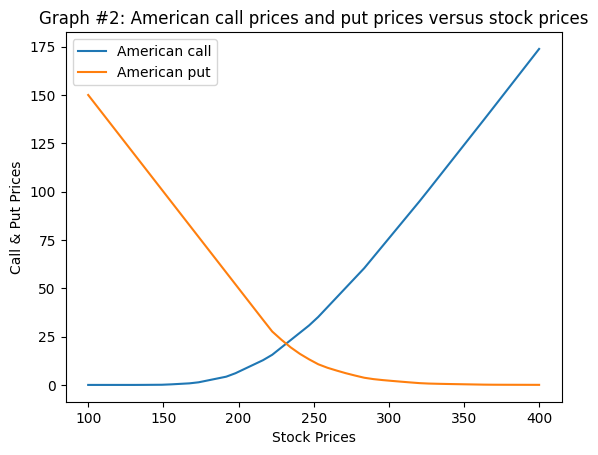

In [ ]:
def am_option_price(s0, K, T, r, v, call = True):
    dt = T/10
    u = np.exp(v*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r*dt) - d) / (u - d)

    St = np.array([s0*(u**i)*(d**(10-i)) for i in range(11)])

    payoff = np.maximum(St - K, 0) if call else np.maximum(K - St,0)

    for step in range (9, -1, -1):
        St = np.array([s0*(u**i)*(d**(step-i)) for i in range(step + 1)])
        payoff = (p*payoff[1:] + (1-p) * payoff[:-1]) * np.exp(-r*dt)
        intrinsic = (St - K) if call else (K-St)
        payoff = np.maximum(payoff, intrinsic)
        # payoff
    return payoff[0]
    # payoff
# am_option_price(S, K, T, r, v, True)
call = np.array([am_option_price(S, K, T, r, v, True) for S in s_range])
put = np.array([am_option_price(S, K, T, r, v, False) for S in s_range])

# plt.figure(
plt.title("Graph #2: American call prices and put prices versus stock prices")
plt.plot(s_range, call, label="American call")
plt.plot(s_range, put, label="American put")
plt.xlabel("Stock Prices")
plt.ylabel("Call & Put Prices")
plt.legend()
plt.show()

**Question 21**

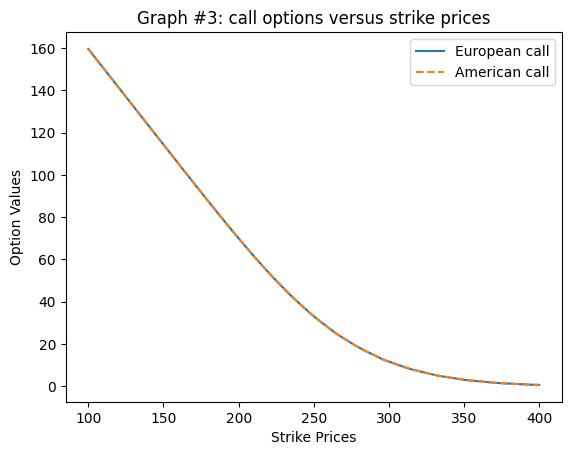

In [ ]:
s0 = 250
T = 1
r = .1
v = .2
s_range = np.linspace(100, 400, 50)

def gen_option_price(s0, K, T, r, v, american = True, steps = 50):
    dt = T/steps
    u = np.exp(v*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r*dt) - d) / (u - d)

    St = np.array([s0*(u**i)*(d**(steps-i)) for i in range(steps+1)])

    payoff = np.maximum(St - K, 0)

    for step in range (steps - 1, -1, -1):
        St = np.array([s0*(u**i)*(d**(step-i)) for i in range(step + 1)])
        payoff = (p*payoff[1:] + (1-p) * payoff[:-1]) * np.exp(-r*dt)
        if american:
            intrinsic = np.maximum(St - K,0)
            payoff = np.maximum(payoff, intrinsic)
        # payoff
    return payoff[0]
    # payoff
# am_option_price(S, K, T, r, v, True)
eurocall = np.array([gen_option_price(s0, K, T, r, v, american = False) for K in s_range])
amercall = np.array([gen_option_price(s0, K, T, r, v, american = True) for K in s_range])

# plt.figure(
plt.title("Graph #3: call options versus strike prices")
plt.plot(s_range, eurocall, label="European call")
plt.plot(s_range, amercall, "--",label="American call")
plt.xlabel("Strike Prices")
plt.ylabel("Option Values")
plt.legend()
plt.show()

**Question 22**

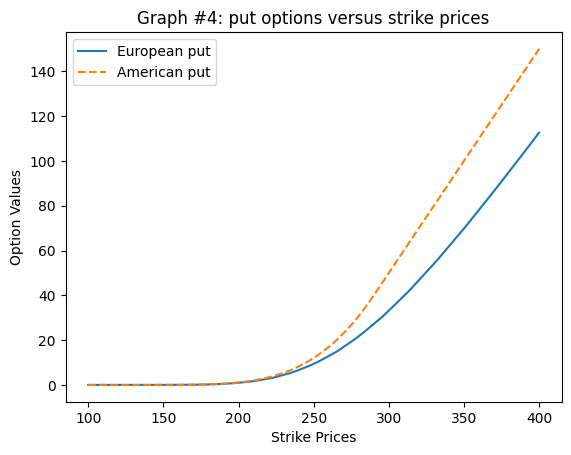

In [ ]:
s0 = 250
T = 1
r = .1
v = .2
s_range = np.linspace(100, 400, 50)

def gen_option_price(s0, K, T, r, v, american = True, steps = 50):
    dt = T/steps
    u = np.exp(v*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r*dt) - d) / (u - d)

    St = np.array([s0*(u**i)*(d**(steps-i)) for i in range(steps+1)])

    payoff = np.maximum(K-St, 0)

    for step in range (steps - 1, -1, -1):
        St = np.array([s0*(u**i)*(d**(step-i)) for i in range(step + 1)])
        payoff = (p*payoff[1:] + (1-p) * payoff[:-1]) * np.exp(-r*dt)
        if american:
            intrinsic = np.maximum(K - St,0)
            payoff = np.maximum(payoff, intrinsic)
        # payoff
    return payoff[0]
    # payoff
# am_option_price(S, K, T, r, v, True)
europut = np.array([gen_option_price(s0, K, T, r, v, american = False) for K in s_range])
amerput = np.array([gen_option_price(s0, K, T, r, v, american = True) for K in s_range])

# plt.figure(
plt.title("Graph #4: put options versus strike prices")
plt.plot(s_range, europut, label="European put")
plt.plot(s_range, amerput, "--",label="American put")
plt.xlabel("Strike Prices")
plt.ylabel("Option Values")
plt.legend()
plt.show()

**Question 23**

In [ ]:
# c_ini = []
# p_ini = []
# for x in call_prices1:
#     c_ini.append(float(x))
# for y in put_prices1:
#     p_ini.append(float(y))
# c_ini
LHS = [x - y for x, y in zip(call_prices1, put_prices1)]
CLEAN_LHS = [float(x) for x in LHS]
k_ini = 100
T = 1
r = 0.05
s_ini = [90, 95, 100, 105, 110]
RHS = []
for x in s_ini:
    RHS_ini = x - (k_ini * np.exp(-r*T))
    RHS.append(RHS_ini)

CLEAN_RHS = [float(x) for x in RHS]

#Comparing LHS and rhs
Difference = [x - y for x, y in zip(CLEAN_LHS, CLEAN_RHS)]
Difference


[20.326206327560676,
 10.615276550819296,
 0.9043467740778963,
 -8.806583002663498,
 -18.517512779404896]

**Put Call Parity Not Satistfied**

**Question 24**

In [ ]:
LHS2 = [x - y for x, y in zip(call_prices2, put_prices2)]
CLEAN_LHS2 = [float(x) for x in LHS2]
CLEAN_LHS2
k_ini = 100
T = 1
r = 0.05
s_ini = [90, 95, 100, 105, 110]


RHS2 = []
for x in s_ini:
    RHS_ini = x - (k_ini * np.exp(-r*T))
    RHS2.append(RHS_ini)

CLEAN_RHS2 =  [float(x) for x in RHS2]
CLEAN_RHS2

[-5.122942450071406,
 -0.12294245007140603,
 4.877057549928594,
 9.877057549928594,
 14.877057549928594]

In [ ]:
#Comparing LHS and rhs
Difference = [x - y for x, y in zip(CLEAN_LHS2, CLEAN_RHS2)]
Difference


[19.351163484369113,
 9.463381706092843,
 -0.5168427333109751,
 -10.582837725940399,
 -20.79901408688075]

**Put Call Parity Not Satistfied**

Question 25

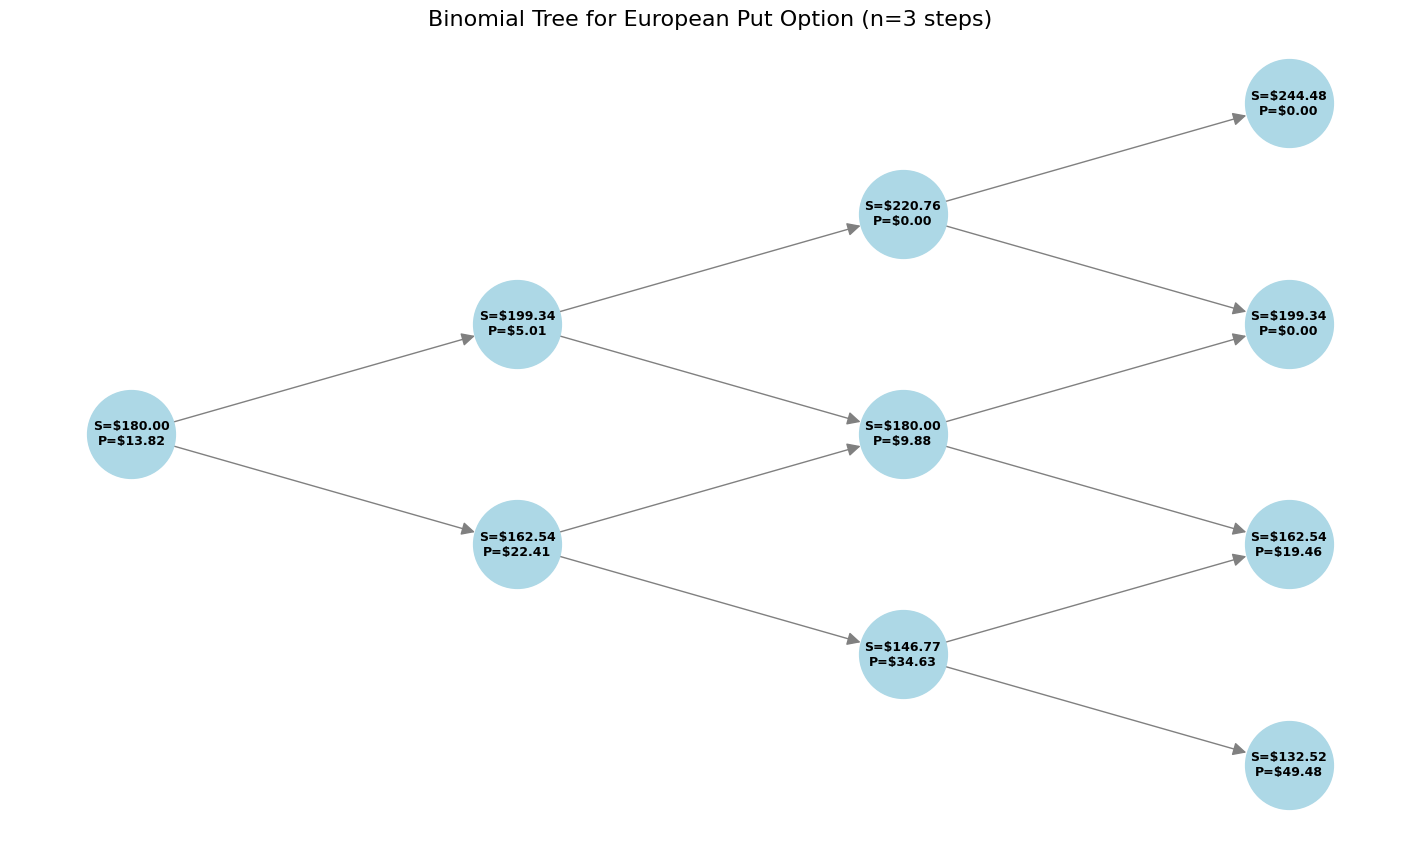

In [ ]:
import math
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd

S0 = 180.0
K = 182.0
r = 0.02
sigma = 0.25
T = 0.5
n = 3

dt = T / n
u = math.exp(sigma * math.sqrt(dt))
d = 1 / u
p = (math.exp(r * dt) - d) / (u - d)


stock_price_tree = [[0.0 for _ in range(n + 1)] for _ in range(n + 1)]
for i in range(n + 1):
    for j in range(i + 1):
        stock_price_tree[j][i] = S0 * (u**(i-j)) * (d**j)

option_value_tree = [[0.0 for _ in range(n + 1)] for _ in range(n + 1)]
for j in range(n + 1):
    option_value_tree[j][n] = max(K - stock_price_tree[j][n], 0)

for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        val_up = option_value_tree[j][i+1]
        val_down = option_value_tree[j+1][i+1]
        option_value_tree[j][i] = math.exp(-r * dt) * (p * val_up + (1-p) * val_down)

put_price = option_value_tree[0][0]


G = nx.DiGraph()
pos = {}
labels = {}

for i in range(n + 1):
    for j in range(i + 1):
        # Node identifier is (time_step, down_moves)
        node_id = (i, j)

        # Position nodes in a tree-like structure
        # x-coordinate is the time step, y-coordinate spreads the nodes vertically
        pos[node_id] = (i, i - 2 * j)

        # Create labels with Stock and Put prices
        S = stock_price_tree[j][i]
        P = option_value_tree[j][i]
        labels[node_id] = f"S=${S:.2f}\nP=${P:.2f}"

        # Add edges to the next time step
        if i < n:
            G.add_edge(node_id, (i + 1, j))      # Up move
            G.add_edge(node_id, (i + 1, j + 1))  # Down move

plt.figure(figsize=(14, 8))
nx.draw(G, pos, labels=labels, with_labels=True, node_size=4000,
        node_color="lightblue", font_size=9, font_weight="bold",
        edge_color="gray", arrowsize=20)
plt.title(f"Binomial Tree for European Put Option (n={n} steps)", fontsize=16)
plt.show()

In [ ]:
def calculate_delta(option_val_up, option_val_down, stock_price_up, stock_price_down):
    return (option_val_up - option_val_down) / (stock_price_up - stock_price_down)

path_stock_prices = [S0]
path_deltas = []
path_actions = []

# At t=0 beginning
delta_0 = calculate_delta(option_value_tree[0][1], option_value_tree[1][1],
                          stock_price_tree[0][1], stock_price_tree[1][1])
path_deltas.append(delta_0)
path_actions.append(f"Sell Put, receive ${put_price:.2f}. Short sell {abs(delta_0):.3f} shares.")

# At t=1 (Down)
S1 = stock_price_tree[1][1]
path_stock_prices.append(S1)
delta_1 = calculate_delta(option_value_tree[1][2], option_value_tree[2][2],
                          stock_price_tree[1][2], stock_price_tree[2][2])
path_deltas.append(delta_1)
shares_to_sell_1 = abs(delta_1) - abs(delta_0)
path_actions.append(f"Stock price is ${S1:.2f}. Short sell an additional {shares_to_sell_1:.3f} shares.")

# At t=2 (Up)
S2 = stock_price_tree[2-1][2] # Equivalent to stock_price_tree[1][2]
path_stock_prices.append(S2)
delta_2 = calculate_delta(option_value_tree[1][3], option_value_tree[2][3],
                          stock_price_tree[1][3], stock_price_tree[2][3])
path_deltas.append(delta_2)
shares_to_buy_2 = abs(delta_1) - abs(delta_2)
path_actions.append(f"Stock price is ${S2:.2f}. Buy back {shares_to_buy_2:.3f} shares to adjust hedge.")

# At t=3 (Down)
S3 = stock_price_tree[2][3]
path_stock_prices.append(S3)
option_payoff = max(K - S3, 0)
shares_to_buy_3 = abs(delta_2) # Close the entire position
path_actions.append(f"Stock price is ${S3:.2f}. Buy back remaining {shares_to_buy_3:.3f} shares. Settle option payoff of ${option_payoff:.2f}.")

# Outline the process
for t, action in enumerate(path_actions):
    print(f"Time (t={t}): {action}")
print("\n")

Time (t=0): Sell Put, receive $13.82. Short sell 0.473 shares.
Time (t=1): Stock price is $162.54. Short sell an additional 0.272 shares.
Time (t=2): Stock price is $180.00. Buy back 0.216 shares to adjust hedge.
Time (t=3): Stock price is $162.54. Buy back remaining 0.529 shares. Settle option payoff of $19.46.




In [ ]:
discount = np.exp(-r * dt)

# Stock price lattice
S = np.zeros((n+1, n+1))
for i in range(n+1):
    for j in range(i+1):
        S[j, i] = S0 * (u**(i-j)) * (d**j)

# Option value lattice
V = np.zeros((n+1, n+1))
delta = np.zeros((n, n))
cash = np.zeros((n, n))

# Terminal payoff
for j in range(n+1):
    V[j, n] = max(K - S[j, n], 0)

# Backward induction
for i in range(n-1, -1, -1):
    for j in range(i+1):
        cont_val = discount * (p * V[j, i+1] + (1-p) * V[j+1, i+1])
        exercise_val = max(K - S[j, i], 0)
        V[j, i] = max(cont_val, exercise_val)

        if i < n:
            delta[j, i] = (V[j, i+1] - V[j+1, i+1]) / (S[j, i+1] - S[j+1, i+1])
            cash[j, i] = V[j, i] - delta[j, i] * S[j, i]

# Extract all-down path
stock_path, option_path, delta_path, cash_path = [], [], [], []
for i in range(n+1):
    j = i  # all down moves
    stock_path.append(S[j, i])
    option_path.append(V[j, i])
    if i < n:
        delta_path.append(delta[j, i])
        cash_path.append(cash[j, i])
    else:
        delta_path.append(0)
        cash_path.append(0)

price, delta_matrix, cash_path, stock_path, delta_path, option_path =  V[0, 0], delta, cash_path, stock_path, delta_path, option_path

data = {
    'Step': range(n + 1),
    'Stock Price': stock_path,
    'Option Price': option_path,
    'Delta': delta_path,
    'Cash Account': cash_path
}

# Create the DataFrame
df = pd.DataFrame(data)
df

,Step,Stock Price,Option Price,Delta,Cash Account
0,0,180.000000,13.978357,-0.480905,100.541208
1,1,162.535230,22.712944,-0.762967,146.721961
2,2,146.765006,35.234994,-1.000000,182.000000
3,3,132.524911,49.475089,0.000000,0.000000


**Question 26**

In [ ]:
import numpy as np

# Parameters
S0 = 180
K = 182
T = 0.5
r = 0.02
sigma = 0.25
N = 25
dt = T / N

def trinomial_tree_american_put_fixed():
    # Parameters
    dx = sigma * np.sqrt(3 * dt)
    u = np.exp(dx)
    d = np.exp(-dx)

    # Probabilities (Boyle's equal jumps method)
    pu = 0.5 * (((sigma**2 * dt) + (r - 0.5*sigma**2)**2 * dt**2) / dx**2 + ((r - 0.5*sigma**2) * dt) / dx)
    pd = 0.5 * (((sigma**2 * dt) + (r - 0.5*sigma**2)**2 * dt**2) / dx**2 - ((r - 0.5*sigma**2) * dt) / dx)
    pm = 1 - pu - pd
    discount = np.exp(-r * dt)

    # Stock price lattice
    S = np.zeros((2*N+1, N+1))
    for i in range(N+1):
        for j in range(-i, i+1):
            S[j+N, i] = S0 * (u**j)

    # Option value lattice
    V = np.zeros((2*N+1, N+1))
    delta = np.zeros((2*N+1, N))
    cash = np.zeros((2*N+1, N))

    # Terminal payoff
    for j in range(-N, N+1):
        V[j+N, N] = max(K - S[j+N, N], 0)

    # Backward induction
    for i in range(N-1, -1, -1):
        for j in range(-i, i+1):
            idx = j + N
            cont_val = discount * (pu * V[idx+1, i+1] + pm * V[idx, i+1] + pd * V[idx-1, i+1])
            exercise_val = max(K - S[idx, i], 0)
            V[idx, i] = max(cont_val, exercise_val)
            if i < N and idx > 0 and idx < 2*N:
                delta[idx, i] = (V[idx+1, i+1] - V[idx-1, i+1]) / (S[idx+1, i+1] - S[idx-1, i+1])
                cash[idx, i] = V[idx, i] - delta[idx, i] * S[idx, i]

    # Extract all-down path
    stock_path, option_path, delta_path, cash_path = [], [], [], []
    for i in range(N+1):
        j = -i
        idx = j + N
        stock_path.append(S[idx, i])
        option_path.append(V[idx, i])
        if i < N:
            delta_path.append(delta[idx, i])
            cash_path.append(cash[idx, i])
        else:
            delta_path.append(0)
            cash_path.append(0)

    return V[N, 0], delta, cash_path, stock_path, delta_path, option_path

# Run model
price, delta_matrix, cash_path, stock_path, delta_path, option_path = trinomial_tree_american_put_fixed()

# Output
print(f"Trinomial Tree American Put Price: ${price:.4f}")
print("\nCash Account Evolution (All-Down Path):")
print("Step | Stock Price | Option Price | Delta | Cash Account")
for i in range(N+1):
    print(f"{i:2d}   | {stock_path[i]:9.2f} | {option_path[i]:11.2f} | {delta_path[i]:6.4f} | {cash_path[i]:12.2f}")


Trinomial Tree American Put Price: $12.9140

Cash Account Evolution (All-Down Path):
Step | Stock Price | Option Price | Delta | Cash Account
 0   |    180.00 |       12.91 | -0.4741 |        98.25
 1   |    169.31 |       18.55 | -0.6203 |       123.57
 2   |    159.25 |       25.33 | -0.7602 |       146.39
 3   |    149.79 |       32.99 | -0.8776 |       164.44
 4   |    140.89 |       41.15 | -0.9640 |       176.97
 5   |    132.52 |       49.48 | -0.9997 |       181.96
 6   |    124.65 |       57.35 | -1.0000 |       182.00
 7   |    117.25 |       64.75 | -1.0000 |       182.00
 8   |    110.28 |       71.72 | -1.0000 |       182.00
 9   |    103.73 |       78.27 | -1.0000 |       182.00
10   |     97.57 |       84.43 | -1.0000 |       182.00
11   |     91.78 |       90.22 | -1.0000 |       182.00
12   |     86.32 |       95.68 | -1.0000 |       182.00
13   |     81.20 |      100.80 | -1.0000 |       182.00
14   |     76.37 |      105.63 | -1.0000 |       182.00
15   |     71.84 |

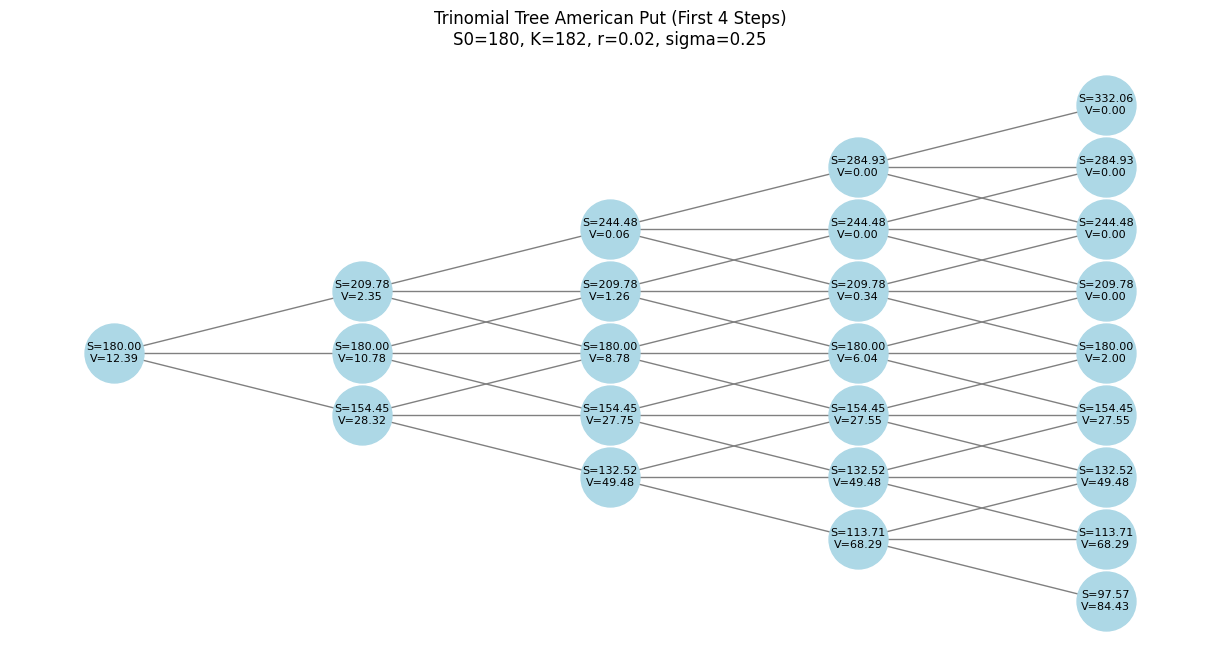

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_trinomial_tree_american_put(S0, K, T, r, sigma, N_plot):
    dt = T / N_plot
    dx = sigma * np.sqrt(3 * dt)
    u = np.exp(dx)
    d = np.exp(-dx)

    # Probabilities
    pu = 0.5 * (((sigma**2 * dt) + (r - 0.5*sigma**2)**2 * dt**2) / dx**2 + ((r - 0.5*sigma**2) * dt) / dx)
    pd = 0.5 * (((sigma**2 * dt) + (r - 0.5*sigma**2)**2 * dt**2) / dx**2 - ((r - 0.5*sigma**2) * dt) / dx)
    pm = 1 - pu - pd
    discount = np.exp(-r * dt)

    # Stock prices
    S = np.zeros((2*N_plot+1, N_plot+1))
    for i in range(N_plot+1):
        for j in range(-i, i+1):
            S[j+N_plot, i] = S0 * (u**j)

    # Option values
    V = np.zeros((2*N_plot+1, N_plot+1))
    for j in range(-N_plot, N_plot+1):
        V[j+N_plot, N_plot] = max(K - S[j+N_plot, N_plot], 0)

    for i in range(N_plot-1, -1, -1):
        for j in range(-i, i+1):
            idx = j + N_plot
            cont_val = discount * (pu * V[idx+1, i+1] + pm * V[idx, i+1] + pd * V[idx-1, i+1])
            exercise_val = max(K - S[idx, i], 0)
            V[idx, i] = max(cont_val, exercise_val)

    # Build graph for plotting
    G = nx.DiGraph()
    pos = {}
    labels = {}
    for i in range(N_plot+1):
        for j in range(-i, i+1):
            node = (i, j)
            pos[node] = (i, j)
            labels[node] = f"S={S[j+N_plot, i]:.2f}\nV={V[j+N_plot, i]:.2f}"
            if i < N_plot:
                G.add_edge(node, (i+1, j+1))
                G.add_edge(node, (i+1, j))
                G.add_edge(node, (i+1, j-1))

    plt.figure(figsize=(12, 6))
    nx.draw(G, pos, labels=labels, node_size=1800, font_size=8,
            node_color="lightblue", edge_color="gray", arrows=False)
    plt.title(f"Trinomial Tree American Put (First {N_plot} Steps)\nS0={S0}, K={K}, r={r}, sigma={sigma}")
    plt.axis("off")
    plt.show()

# Example plot for first 4 steps
plot_trinomial_tree_american_put(S0=180, K=182, T=0.5, r=0.02, sigma=0.25, N_plot=4)


In [ ]:
import numpy as np

# Parameters
S0 = 180
K = 182
T = 0.5
r = 0.02
sigma = 0.25
N = 25
dt = T / N

def binomial_tree_american_put():
    # Up and down factors (Cox-Ross-Rubinstein)
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u

    # Risk-neutral probability
    p = (np.exp(r * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    # Stock price lattice
    S = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            S[j, i] = S0 * (u**(i-j)) * (d**j)

    # Option value lattice
    V = np.zeros((N+1, N+1))
    delta = np.zeros((N, N))
    cash = np.zeros((N, N))

    # Terminal payoff
    for j in range(N+1):
        V[j, N] = max(K - S[j, N], 0)

    # Backward induction
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            cont_val = discount * (p * V[j, i+1] + (1-p) * V[j+1, i+1])
            exercise_val = max(K - S[j, i], 0)
            V[j, i] = max(cont_val, exercise_val)

            if i < N:
                delta[j, i] = (V[j, i+1] - V[j+1, i+1]) / (S[j, i+1] - S[j+1, i+1])
                cash[j, i] = V[j, i] - delta[j, i] * S[j, i]

    # Extract all-down path
    stock_path, option_path, delta_path, cash_path = [], [], [], []
    for i in range(N+1):
        j = i  # all down moves
        stock_path.append(S[j, i])
        option_path.append(V[j, i])
        if i < N:
            delta_path.append(delta[j, i])
            cash_path.append(cash[j, i])
        else:
            delta_path.append(0)
            cash_path.append(0)

    return V[0, 0], delta, cash_path, stock_path, delta_path, option_path

# Run model
price, delta_matrix, cash_path, stock_path, delta_path, option_path = binomial_tree_american_put()

# Output
print(f"Binomial Tree American Put Price: ${price:.4f}")
print("\nCash Account Evolution (All-Down Path):")
print("Step | Stock Price | Option Price | Delta    | Cash Account")
for i in range(N+1):
    print(f"{i:2d}   | {stock_path[i]:9.2f} | {option_path[i]:11.2f} | {delta_path[i]:8.4f} | {cash_path[i]:12.2f}")


Binomial Tree American Put Price: $13.0357

Cash Account Evolution (All-Down Path):
Step | Stock Price | Option Price | Delta    | Cash Account
 0   |    180.00 |       13.04 |  -0.4756 |        98.64
 1   |    173.75 |       16.05 |  -0.5608 |       113.49
 2   |    167.71 |       19.48 |  -0.6479 |       128.14
 3   |    161.89 |       23.30 |  -0.7331 |       141.98
 4   |    156.26 |       27.48 |  -0.8124 |       154.43
 5   |    150.83 |       31.96 |  -0.8822 |       165.03
 6   |    145.59 |       36.64 |  -0.9400 |       173.51
 7   |    140.54 |       41.47 |  -0.9844 |       179.81
 8   |    135.65 |       46.35 |  -1.0000 |       182.00
 9   |    130.94 |       51.06 |  -1.0000 |       182.00
10   |    126.39 |       55.61 |  -1.0000 |       182.00
11   |    122.00 |       60.00 |  -1.0000 |       182.00
12   |    117.77 |       64.23 |  -1.0000 |       182.00
13   |    113.67 |       68.33 |  -1.0000 |       182.00
14   |    109.73 |       72.27 |  -1.0000 |       182.00
1

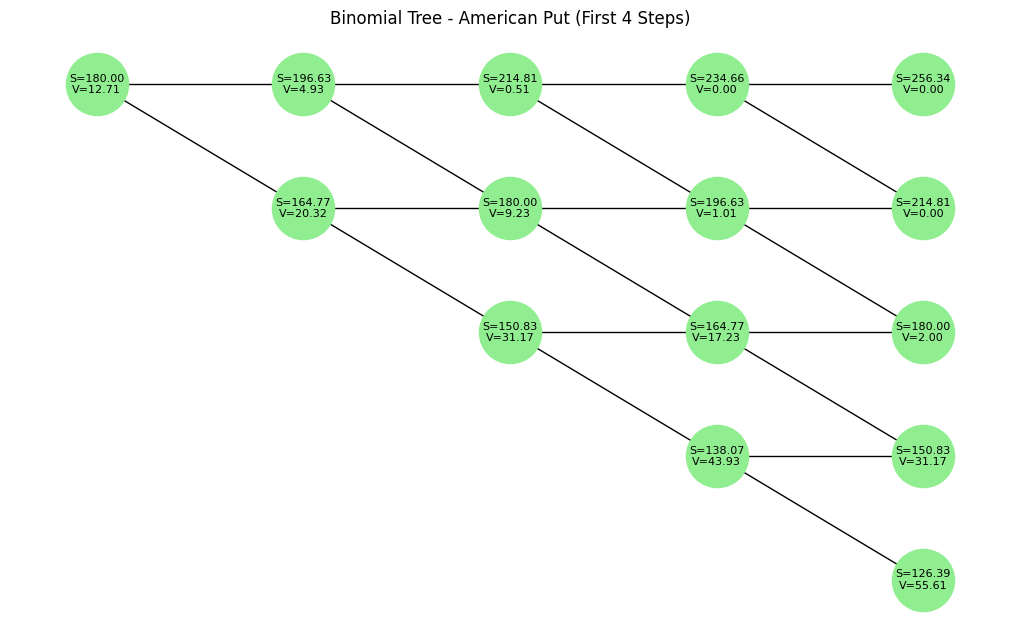

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
S0 = 180
K = 182
T = 0.5
r = 0.02
sigma = 0.25
N = 4  # Show only first 4 steps for visualization clarity
dt = T / N

def binomial_tree_american_put_small():
    # Up and down factors (CRR)
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    # Stock price lattice
    S = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            S[j, i] = S0 * (u**(i-j)) * (d**j)

    # Option value lattice
    V = np.zeros((N+1, N+1))

    # Terminal payoff
    for j in range(N+1):
        V[j, N] = max(K - S[j, N], 0)

    # Backward induction
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            cont_val = discount * (p * V[j, i+1] + (1-p) * V[j+1, i+1])
            exercise_val = max(K - S[j, i], 0)
            V[j, i] = max(cont_val, exercise_val)

    return S, V

# Get first 4 steps
S, V = binomial_tree_american_put_small()

# Plot binomial tree with prices
G = nx.Graph()
pos = {}
labels = {}

for i in range(N+1):
    for j in range(i+1):
        node = f"{i}-{j}"
        pos[node] = (i, -j)
        labels[node] = f"S={S[j,i]:.2f}\nV={V[j,i]:.2f}"
        if i < N:
            G.add_edge(node, f"{i+1}-{j}")     # up move
            G.add_edge(node, f"{i+1}-{j+1}")   # down move

plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color="lightgreen", font_size=8)
plt.title("Binomial Tree - American Put (First 4 Steps)")
plt.axis("off")
plt.show()


Question 27

In [ ]:
import math
import random

# Parameters
S0 = 180.0
K = S0  # ATM
r = 0.02
sigma = 0.25
T = 0.5
n = 25

dt = T / n
u = math.exp(sigma * math.sqrt(dt))
d = 1 / u
p = (math.exp(r * dt) - d) / (u - d)

stock_price_tree = [[S0 * (u**(i-j)) * (d**j) for j in range(i + 1)] for i in range(n + 1)]

option_value_tree = [[{} for _ in range(i + 1)] for i in range(n + 1)]
option_value_tree[0][0] = {S0: 0}

# Forward pass
for i in range(n):
    for j in range(i + 1):
        for running_sum in option_value_tree[i][j]:
            new_sum_up = running_sum + stock_price_tree[i+1][j]
            option_value_tree[i+1][j][new_sum_up] = 0
            new_sum_down = running_sum + stock_price_tree[i+1][j+1]
            option_value_tree[i+1][j+1][new_sum_down] = 0

# Calculate
for j in range(n + 1):
    for running_sum in option_value_tree[n][j]:
        average_price = running_sum / (n + 1)
        option_value_tree[n][j][running_sum] = max(K - average_price, 0)

# Backward pass
for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        for running_sum in option_value_tree[i][j]:
            sum_up = running_sum + stock_price_tree[i+1][j]
            val_up = option_value_tree[i+1][j][sum_up]
            sum_down = running_sum + stock_price_tree[i+1][j+1]
            val_down = option_value_tree[i+1][j+1][sum_down]
            option_value_tree[i][j][running_sum] = math.exp(-r * dt) * (p * val_up + (1 - p) * val_down)

asian_put_price = option_value_tree[0][0][S0]
print(f"Calculated ATM Asian Put Price: ${asian_put_price:.4f}\n")

def calculate_asian_delta(time_step, down_steps, current_sum):
    if time_step >= n:
        return 0.0
    stock_up = stock_price_tree[time_step+1][down_steps]
    stock_down = stock_price_tree[time_step+1][down_steps+1]
    sum_up = current_sum + stock_up
    sum_down = current_sum + stock_down
    option_val_up = option_value_tree[time_step+1][down_steps][sum_up]
    option_val_down = option_value_tree[time_step+1][down_steps+1][sum_down]
    delta = (option_val_up - option_val_down) / (stock_up - stock_down)
    return delta

# Choose a random path
path_moves = random.choices(['up', 'down'], k=n)
current_down_steps = 0
running_sum = S0
path_actions = []

# At t=0
delta_0 = calculate_asian_delta(0, 0, running_sum)
action = f"Sell Put, receive ${asian_put_price:.2f}. To hedge, short sell {abs(delta_0):.4f} shares."
path_actions.append(action)
last_delta = delta_0

# Follow the path and hedge
for t, move in enumerate(path_moves):
    if move == 'down':
        current_down_steps += 1
    current_stock_price = stock_price_tree[t+1][current_down_steps]
    running_sum += current_stock_price
    new_delta = calculate_asian_delta(t+1, current_down_steps, running_sum)
    shares_to_trade = abs(new_delta) - abs(last_delta)
    if shares_to_trade > 0:
        action = f"Stock is ${current_stock_price:.2f} ({move}). Short sell an additional {shares_to_trade:.4f} shares."
    else:
        action = f"Stock is ${current_stock_price:.2f} ({move}). Buy back {-shares_to_trade:.4f} shares."
    path_actions.append(action)
    last_delta = new_delta

print("Delta Hedging for a Random Path (Asian Put):")
for t, action in enumerate(path_actions):
    print(f"Time (t={t}): {action}")

final_average = running_sum / (n + 1)
option_payoff = max(K - final_average, 0)
print(f"Time (t={n}): Path ends. Buy back all {abs(last_delta):.4f} shares. Settle option payoff of ${option_payoff:.2f}.")

Calculated ATM Asian Put Price: $6.8090

Delta Hedging for a Random Path (Asian Put):
Time (t=0): Sell Put, receive $6.81. To hedge, short sell 0.4440 shares.
Time (t=1): Stock is $173.75 (down). Short sell an additional 0.1151 shares.
Time (t=2): Stock is $180.00 (up). Buy back 0.1438 shares.
Time (t=3): Stock is $186.48 (up). Buy back 0.1411 shares.
Time (t=4): Stock is $193.19 (up). Buy back 0.1213 shares.
Time (t=5): Stock is $200.14 (up). Buy back 0.0864 shares.
Time (t=6): Stock is $207.34 (up). Buy back 0.0468 shares.
Time (t=7): Stock is $214.81 (up). Buy back 0.0167 shares.
Time (t=8): Stock is $207.34 (down). Short sell an additional 0.0030 shares.
Time (t=9): Stock is $200.14 (down). Short sell an additional 0.0057 shares.
Time (t=10): Stock is $207.34 (up). Buy back 0.0108 shares.
Time (t=11): Stock is $214.81 (up). Buy back 0.0010 shares.
Time (t=12): Stock is $207.34 (down). Buy back -0.0000 shares.
Time (t=13): Stock is $214.81 (up). Buy back -0.0000 shares.
Time (t=14):

In [ ]:
stock_path, option_path, delta_path, cash_path = [], [], [], []
running_sum = 0
current_down_steps = 0
path_moves = ['down'] * n

# Handle Step 0
current_stock = S0
running_sum += current_stock
current_option_val = option_value_tree[0][0][running_sum]
current_delta = calculate_asian_delta(0, 0, running_sum)

stock_path.append(current_stock)
option_path.append(current_option_val)
delta_path.append(current_delta)
cash_path.append(current_option_val - current_delta * current_stock)

# 3. Loop through the random path and populate the lists
for t, move in enumerate(path_moves):
    if move == 'down':
        current_down_steps += 1

    # Get values for the current step in the random path
    current_stock = stock_price_tree[t+1][current_down_steps]
    running_sum += current_stock
    current_option_val = option_value_tree[t+1][current_down_steps][running_sum]
    current_delta = calculate_asian_delta(t+1, current_down_steps, running_sum)

    # Append data to lists
    stock_path.append(current_stock)
    option_path.append(current_option_val)
    delta_path.append(current_delta)
    cash_path.append(current_option_val - current_delta * current_stock)


# 4. Create and Display the DataFrame
data = {
    'Step': range(n + 1),
    'Move': ['start'] + path_moves,
    'Stock Price': stock_path,
    'Option Price': option_path,
    'Delta': delta_path,
    'Cash Account': cash_path
}
df = pd.DataFrame(data)

pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.4f}'.format
df

,Step,Move,Stock Price,Option Price,Delta,Cash Account
0,0,start,180.0000,6.8090,-0.4440,86.7224
1,1,down,173.7472,9.6197,-0.5590,106.7526
2,2,down,167.7117,13.0365,-0.6598,123.6924
3,3,down,161.8857,16.9299,-0.7295,135.0233
4,4,down,156.2622,21.0862,-0.7595,139.7658
5,5,down,150.8340,25.2648,-0.7539,138.9834
6,6,down,145.5944,29.2707,-0.7262,135.0066
7,7,down,140.5368,32.9978,-0.6899,129.9489
8,8,down,135.6549,36.4176,-0.6518,124.8318
9,9,down,130.9426,39.5388,-0.6135,119.8776


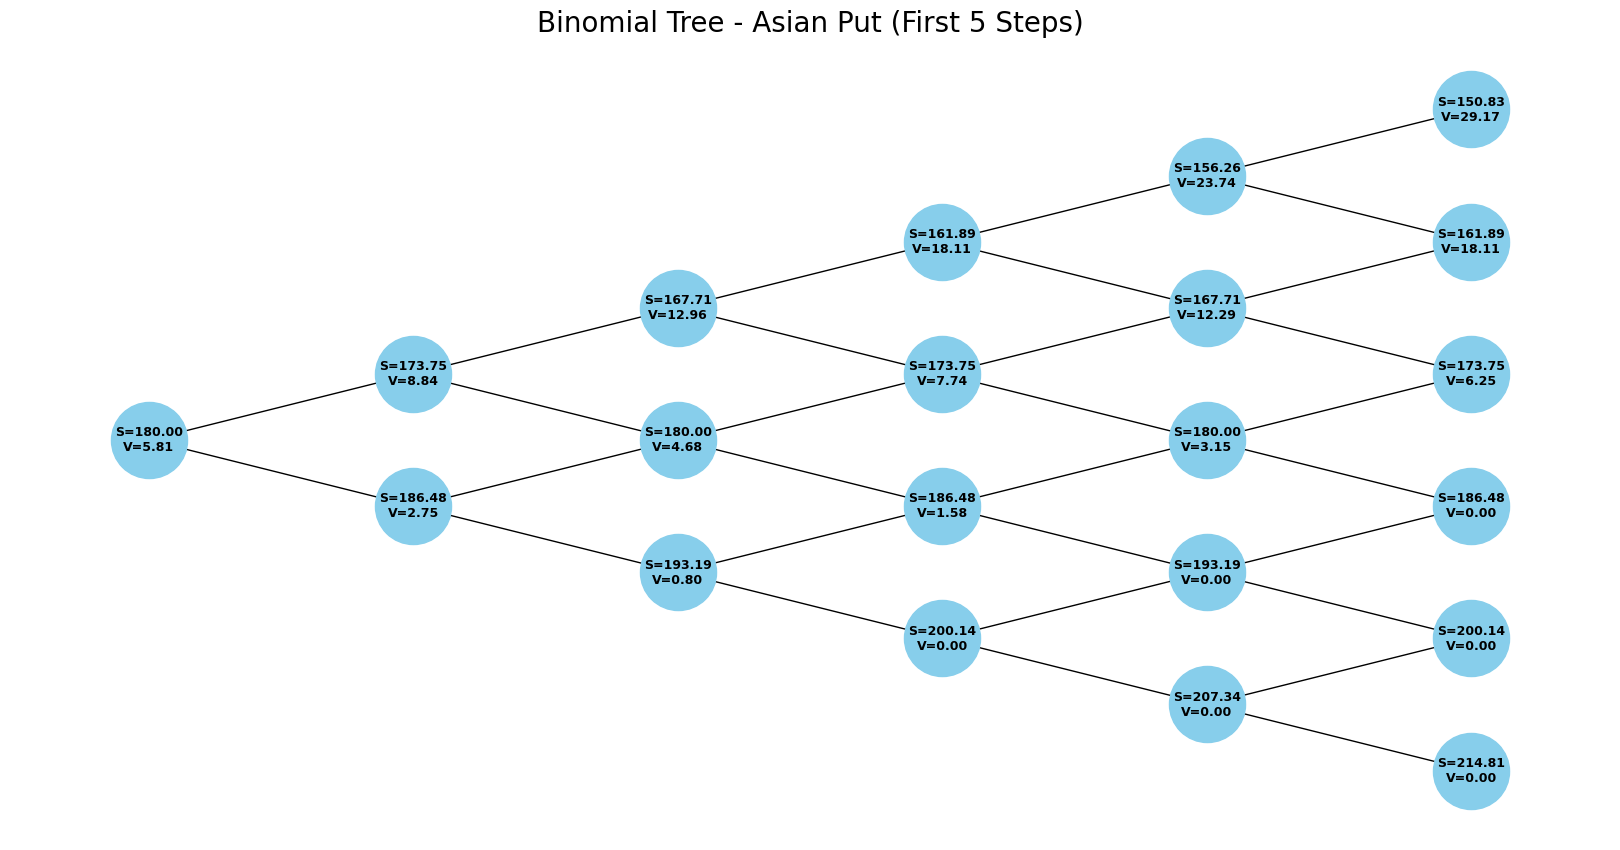

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Number of steps to visualize
N = 5

# Calculated values
u = math.exp(sigma * math.sqrt(dt))
d = 1 / u
p = (math.exp(r * dt) - d) / (u - d)
discount = math.exp(-r * dt)

# Stock price lattice
S = np.zeros((N + 1, N + 1))
for i in range(N + 1):
    for j in range(i + 1):
        S[j, i] = S0 * (u**(i - j)) * (d**j)

# Option value lattice
V = np.zeros((N + 1, N + 1))

# Terminal payoff for the 10th step
for j in range(N + 1):
    V[j, N] = max(K - S[j, N], 0)

# Backward induction
for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        cont_val = discount * (p * V[j, i + 1] + (1 - p) * V[j + 1, i + 1])
        exercise_val = max(K - S[j, i], 0)
        V[j, i] = max(cont_val, exercise_val)

G = nx.Graph()
pos = {}
labels = {}

for i in range(N + 1):
    for j in range(i + 1):
        node = f"{i}-{j}"
        # Position nodes in a tree layout
        pos[node] = (i, (2 * j - i) * 1.5) # Adjust vertical spacing
        labels[node] = f"S={S[j,i]:.2f}\nV={V[j,i]:.2f}"
        if i < N:
            G.add_edge(node, f"{i+1}-{j}")     # up move
            G.add_edge(node, f"{i+1}-{j+1}")   # down move

plt.figure(figsize=(16, 8))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color="skyblue", font_size=9, font_weight="bold")
plt.title("Binomial Tree - Asian Put (First 5 Steps)", fontsize=20)
plt.axis("off")
plt.show()